# single-cell RNA-seq data analysis pipeline

Dataset from: https://cell2location.cog.sanger.ac.uk/tutorial/mouse_brain_visium_wo_cloupe_data.zip

Package used: Scanpy

In [2]:
!pip install scanpy

     ---------------------------------------- 2.0/2.0 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 88.2/88.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for stdlib_list from https://files.pythonhosted.org/packages/be/f4/08daf83c6414031b46e883cb5e06286077e52e8e2f1ae4b3662819a211aa/stdlib_list-0.9.0-py3-none-any.whl.metadata
   ---------------------------------------- 75.6/75.6 kB 2.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=598399fb795d2c0bb3d724570d816b2f13461d4d3e60a9fe7d588e47628f6dc1
  Stored in dir

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


From Tutorial:
Anndata library, short for "AnnData" (Annotated Data), data structure in the field of single-cell RNA sequencing (scRNA-seq) analysis. It is part of the Scanpy library and provides a flexible and efficient way to store, manipulate, and analyze scRNA-seq data.

Rows= Cells
Columns = Genes

In [1]:
!pip install anndata

  Obtaining dependency information for anndata from https://files.pythonhosted.org/packages/a7/ee/767a05c299d95b438ef9c8ab6dbc15896cfb9121cf4327fe1da160a45343/anndata-0.9.2-py3-none-any.whl.metadata
  Obtaining dependency information for natsort from https://files.pythonhosted.org/packages/ef/82/7a9d0550484a62c6da82858ee9419f3dd1ccc9aa1c26a1e43da3ecd20b0d/natsort-8.4.0-py3-none-any.whl.metadata
   ---------------------------------------- 104.2/104.2 kB 2.9 MB/s eta 0:00:00


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


## **Load data**
<br>
We will be using 10X Visum data spatial transcriptomics technology data from 10x's website. Data has been filtered

In [1]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
import gc
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl

Raw data can also be read in csv or h5 or matrix

In [222]:
# Set paths to data 
sp_data_folder = r'C:\Users\aubhi\OneDrive - University of California, San Francisco\Desktop\Springboard\Notebooks from web\Outside\Spatial'

Read the data into an AnnData object

In [223]:
adata = sc.read_visium(sp_data_folder, count_file='filtered_feature_bc_matrix.h5', load_images=True)


C:\Users\aubhi\anaconda3\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


The adata.var_names_make_unique() function is used in Scanpy to ensure that the variable (feature) names in the adata.var_names attribute are unique. It checks if there are any duplicate variable names and modifies them to make them unique if necessary.

In [224]:
adata.var_names_make_unique()

In [225]:
adata

AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [226]:
adata.shape

(2987, 31053)

In this data set we see 2987 cells (n_obs) and 31053 genes (n_vars).

In [227]:
adata.obs.head()  #We have 2987 such observations (cells)

in_tissue  array_row  array_col
AAACAAGTATCTCCCA-1          1         50        102
AAACACCAATAACTGC-1          1         59         19
AAACAGAGCGACTCCT-1          1         14         94
AAACAGCTTTCAGAAG-1          1         43          9
AAACAGGGTCTATATT-1          1         47         13

Note that the first column vlaues (e.g., AAACAAGTATCTCCCA-1	) represent the barcodes associated with each cell in the AnnData object.

In [228]:
adata.var.head() #We have 31053 such variables (genes)

gene_ids    feature_types              genome
Xkr4     ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna
Gm1992   ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna
Gm37381  ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna
Rp1      ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna
Sox17    ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna

What are the highest expressed genes?

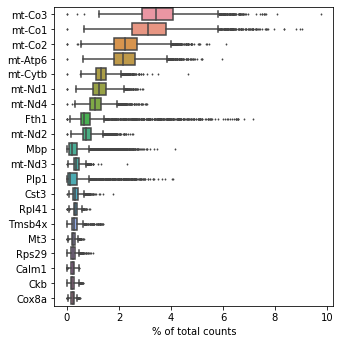

In [229]:
# Highest expressing genes function
sc.pl.highest_expr_genes(adata, n_top=20)

In [230]:
data_array = adata.X

In [231]:
data_array

<2987x31053 sparse matrix of type '<class 'numpy.float32'>'
	with 13475279 stored elements in Compressed Sparse Row format>

In [232]:
data_array.shape

(2987, 31053)

In [233]:
print (data_array[0:10, 0:10])

  (0, 0)	2.0
  (2, 9)	3.0
  (2, 6)	2.0
  (4, 9)	5.0
  (4, 0)	1.0
  (5, 6)	1.0
  (6, 6)	1.0
  (6, 0)	1.0
  (7, 9)	1.0
  (7, 6)	2.0
  (9, 6)	1.0
  (9, 0)	1.0


### This array contains infinite values. Remove them using a boolean mask

In [234]:
#sparse matrix is not supported for np
np.isnan(data_array)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [235]:
is_inf_values = np.isinf(data_array)

TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [236]:
# Convert the sparse matrix to a dense matrix
dense_array = adata.X.toarray()
dense_array

array([[2., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [237]:
# shape of the dense array
dense_array.shape

(2987, 31053)

In [238]:
np.isinf(dense_array)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [239]:
np.isnan(dense_array)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [240]:
# Apply np.isinf() on the dense array
is_inf_values = np.isinf(dense_array)

In [241]:
is_inf_values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [242]:
# Inspecting the effect of np.isinf vs ~np.isinf
print (np.isinf(is_inf_values))
print (~np.isinf(is_inf_values))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [243]:
# This is why we needed a boolean mask; because otherwise the dta structure would be flattended
dense_array[~np.isinf(dense_array)]

array([2., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [244]:
dense_array_flat= dense_array[~np.isinf(dense_array)]
dense_array_flat.shape

(92755311,)

In [245]:
# Alternative to what is being done here
non_inf_rows = ~np.any(np.isinf(dense_array), axis=1)
non_inf_cols = ~np.any(np.isinf(dense_array), axis=0)

subset_array = dense_array[non_inf_rows][:, non_inf_cols]
subset_array

array([[2., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [246]:
dense_array_2 = dense_array[~np.isinf(dense_array[:, 1])]
dense_array_2

array([[2., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [247]:
filtered_values = dense_array[~np.isinf(is_inf_values)]
filtered_values

array([2., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [248]:
filtered_values_2 = dense_array[dense_array[:, 1] = ~np.isinf(is_inf_col2_values)]
filtered_values_2

SyntaxError: invalid syntax (Temp/ipykernel_21452/3314093488.py, line 1)

In [ ]:
filtered_rows = ~np.isinf(is_inf_values)
filtered_values_2 = dense_array[filtered_rows]
filtered_values_2

In [ ]:
#Create Anndata form infinite removed dense array
adata_inf_rm = sc.AnnData(X=dense_array)

In [ ]:
adata_inf_rm = sc.AnnData(X=dense_array_2)

### adatainfinite value removal failed misearbly 

In [250]:
sc.pp.highly_variable_genes(adata_inf_rm)
adata_subset = adata[:, adata.var['highly_variable']]

ValueError: cannot specify integer `bins` when input data contains infinity

In [ ]:
sc.pl.violin(adata, 'Yap1')

In [ ]:
sc.pl.heatmap(adata, var_names= ['Yap1', 'Lamp1', 'Lamp2', 'Tead1', 'Tead2', 'Tead3', 'Tead4', 'Sox10', 'Sox2', 'Klf4', 'Nanog', 'Cyr61', 'Birc5', 'Ctgf'], groupby= 'in_tissue')

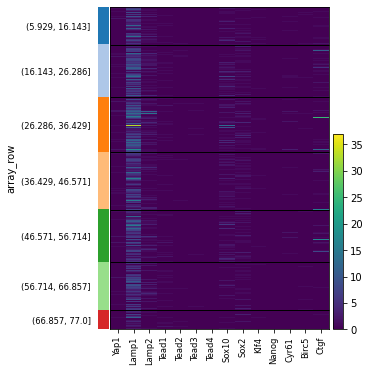

In [251]:
sc.pl.heatmap(adata, var_names= ['Yap1', 'Lamp1', 'Lamp2', 'Tead1', 'Tead2', 'Tead3', 'Tead4', 'Sox10', 'Sox2', 'Klf4', 'Nanog', 'Cyr61', 'Birc5', 'Ctgf'], groupby= 'array_row')

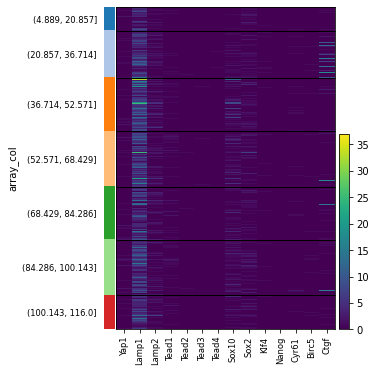

In [252]:
sc.pl.heatmap(adata, var_names= ['Yap1', 'Lamp1', 'Lamp2', 'Tead1', 'Tead2', 'Tead3', 'Tead4', 'Sox10', 'Sox2', 'Klf4', 'Nanog', 'Cyr61', 'Birc5', 'Ctgf'], groupby= 'array_col')

In [253]:
adata.var_names[30000:]

Index(['Napg', 'Piezo2', 'Gm26972', 'Txnl1', 'Wdr7', 'St8sia3os', 'St8sia3',
       'Onecut2', 'Fech', 'Nars',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=1053)

In [254]:
# You cannot find particular value; that sound weird; there must be a way
adata.var_names['Lamp1']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

#### Ways to do that----- 

In [255]:
avnames= adata.var_names
lamp1 = avnames[avnames == 'Lamp1']
lamp1

Index(['Lamp1'], dtype='object')

In [256]:
lamp1_2 = adata.var_names[adata.var_names == 'Lamp1']
lamp1_2

Index(['Lamp1'], dtype='object')

In [257]:
adata.var_names

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=31053)

#### Now applying this

In [258]:
mt_genes= adata.var_names[adata.var_names.str.startswith('mt-')]
mt_genes

Index(['mt-Nd1', 'mt-Nd2', 'mt-Co1', 'mt-Co2', 'mt-Atp8', 'mt-Atp6', 'mt-Co3',
       'mt-Nd3', 'mt-Nd4l', 'mt-Nd4', 'mt-Nd5', 'mt-Nd6', 'mt-Cytb'],
      dtype='object')

In [259]:
mt_genes.shape

(13,)

In [260]:
len(mt_genes)

13

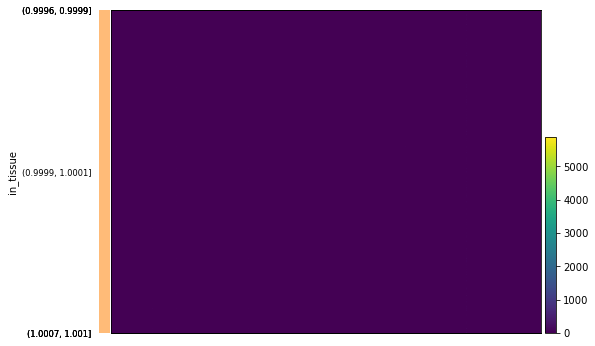

In [261]:
sc.pl.heatmap(adata, var_names= adata.var_names[100:], groupby= 'in_tissue') # Heatmap just by itself doesn't work

In [262]:
help(sc.pl.heatmap)

Help on function heatmap in module scanpy.plotting._anndata:

heatmap(adata: anndata._core.anndata.AnnData, var_names: Union[str, Sequence[str], Mapping[str, Union[str, Sequence[str]]]], groupby: Union[str, Sequence[str]], use_raw: Optional[bool] = None, log: bool = False, num_categories: int = 7, dendrogram: Union[bool, str] = False, gene_symbols: Optional[str] = None, var_group_positions: Optional[Sequence[Tuple[int, int]]] = None, var_group_labels: Optional[Sequence[str]] = None, var_group_rotation: Optional[float] = None, layer: Optional[str] = None, standard_scale: Optional[Literal['var', 'obs']] = None, swap_axes: bool = False, show_gene_labels: Optional[bool] = None, show: Optional[bool] = None, save: Union[str, bool, NoneType] = None, figsize: Optional[Tuple[float, float]] = None, vmin: Optional[float] = None, vmax: Optional[float] = None, vcenter: Optional[float] = None, norm: Optional[matplotlib.colors.Normalize] = None, **kwds)
    Heatmap of the expression values of genes.


### From a tutorial:
#### In an AnnData object, adata.X represents the attribute that stores the main data matrix, typically referred to as the "X" matrix. It contains the gene expression data, where each row corresponds to a cell (observation) and each column corresponds to a gene (variable). It is a sparse matrix representation of the gene expression data to efficiently handle large-scale single-cell RNA sequencing (scRNA-seq) datasets, where the majority of entries are zero. 

In [263]:
# Convert the sparse matrix to a dense matrix
dense_matrix = adata.X.toarray()

# Print the dense matrix
print(dense_matrix)

[[2. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Print all genes with non-zero expression is a given cell.

In [264]:
cell_index = 0  # Index of the cell you want to examine

# Access the expression data for the specific cell
gene_expression = adata.X[cell_index]

# Get the indices of the genes with non-zero expression in the cell
expressed_gene_indices = gene_expression.nonzero()[1]

# Access the gene names from the 'var_names' attribute
expressed_genes = adata.var_names[expressed_gene_indices]

# Print the list of expressed genes in the cell
print(expressed_genes)

Index(['AC149090.1', 'mt-Cytb', 'mt-Nd5', 'mt-Nd4', 'mt-Nd4l', 'mt-Nd3',
       'mt-Co3', 'mt-Atp6', 'mt-Atp8', 'mt-Co2',
       ...
       'Ncoa2', 'A830018L16Rik', 'Cops5', 'Snhg6', '1700034P13Rik', 'Vcpip1',
       'Adhfe1', 'Sntg1', 'Atp6v1h', 'Xkr4'],
      dtype='object', length=4678)


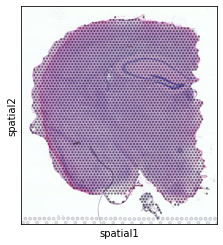

In [265]:
sc.pl.spatial(adata, img_key="hires", alpha=0.5) #Change alpha to 0 to see the tissue sample or plot by setting color=None

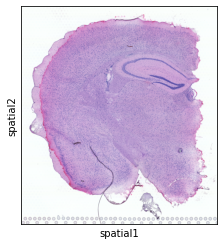

In [266]:
#Image without overlap
sc.pl.spatial(adata, img_key="hires", color=None)

In [267]:
gene_names = adata.var.index
gene_names

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=31053)

In [268]:
print("Is Rorb gene present in the vars?", "Rorb" in gene_names)
print("Is Vip gene present in the vars?", "Vip" in gene_names)

Is Rorb gene present in the vars? True
Is Vip gene present in the vars? True


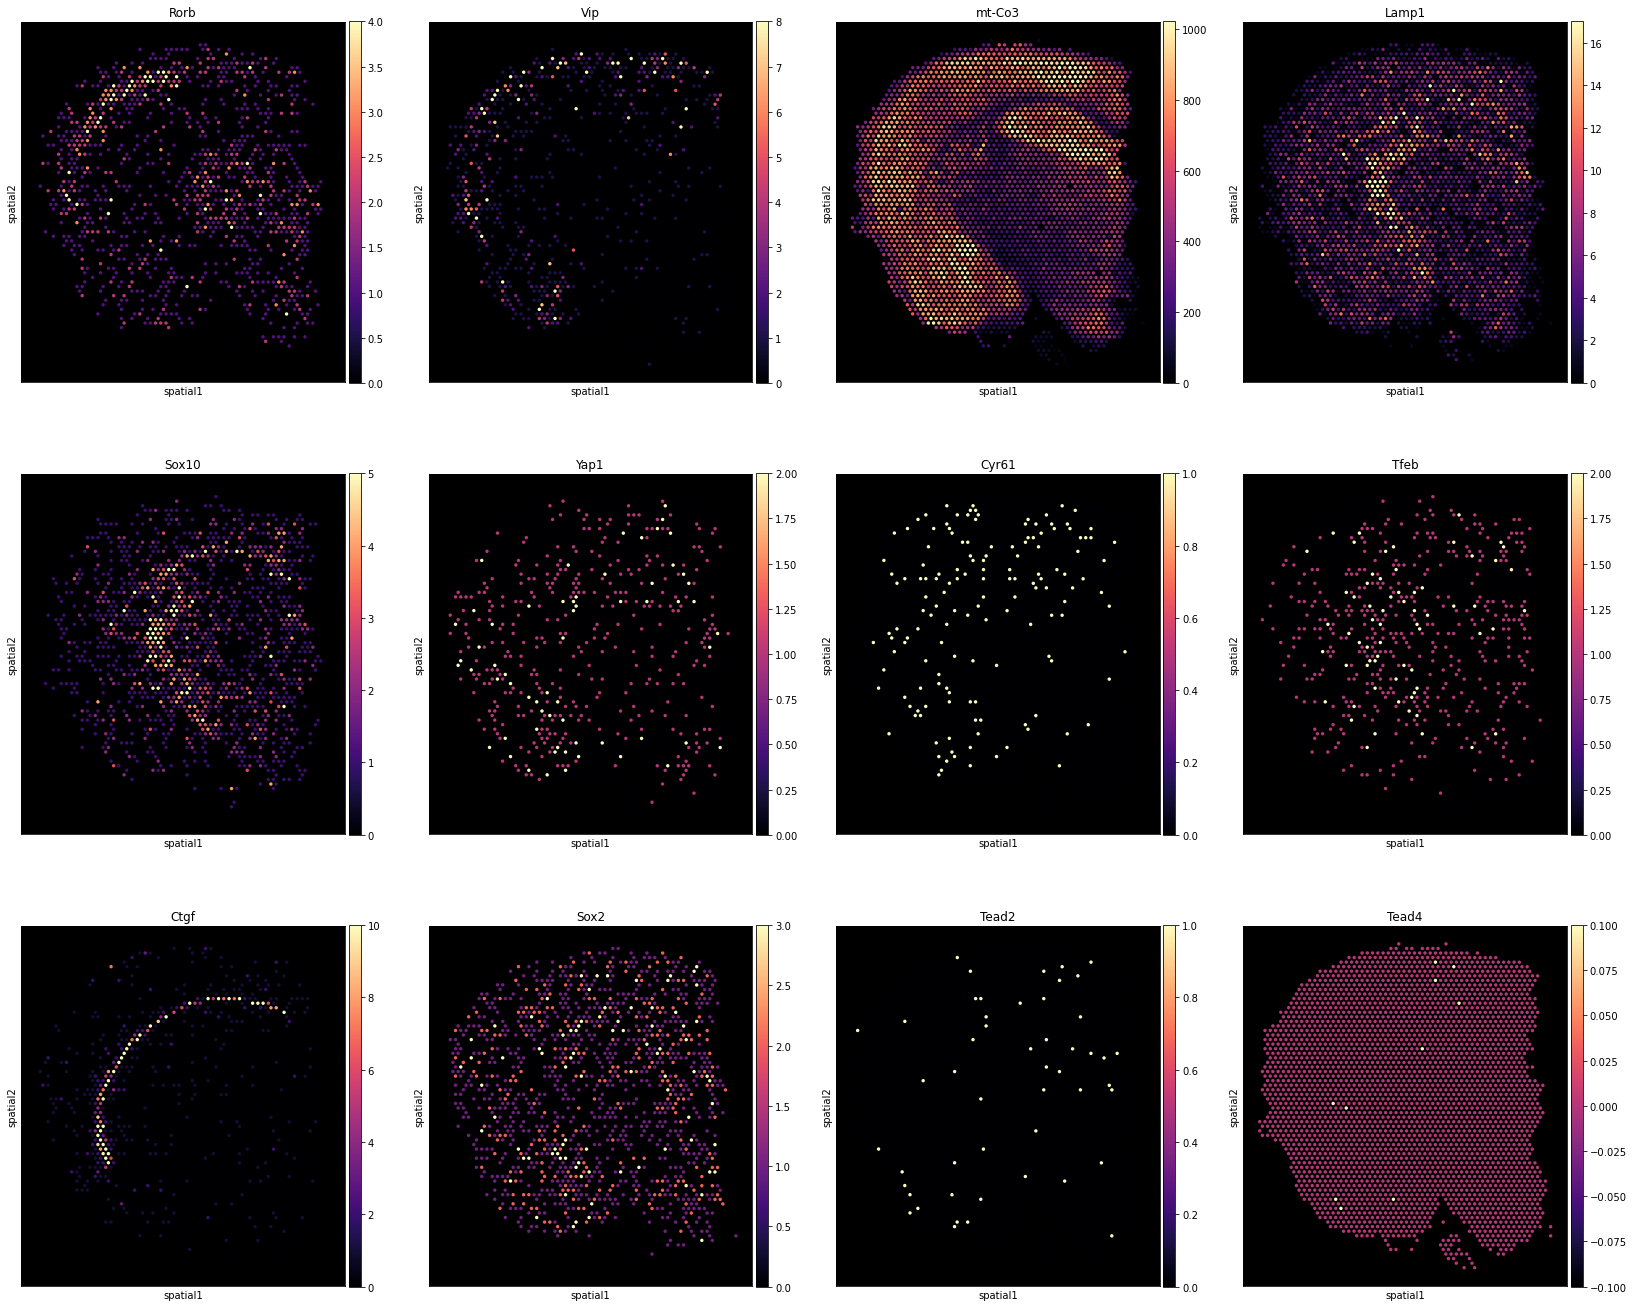

In [269]:
with mpl.rc_context({'figure.figsize': [6,7],
                     'axes.facecolor': 'black'}):
  sc.pl.spatial(adata, color=["Rorb", "Vip", "mt-Co3", "Lamp1", "Sox10", 'Yap1', 'Cyr61', 'Tfeb', 'Ctgf', 'Sox2', 'Tead2', 'Tead4'], img_key=None, size=1,
                    vmin=0, cmap='magma', vmax='p99.0',
                    gene_symbols='SYMBOL'
                  ) 

# **Cleanup and data wrangling the data for analysis**

In [270]:
#sc.pp.calculate_qc_metrics(adata, inplace=True)

Mito exclusion

In [271]:
adata.var[adata.var.index.str.startswith('mt-')]

gene_ids    feature_types              genome
mt-Nd1   ENSMUSG00000064341  Gene Expression  mm10-3.0.0_premrna
mt-Nd2   ENSMUSG00000064345  Gene Expression  mm10-3.0.0_premrna
mt-Co1   ENSMUSG00000064351  Gene Expression  mm10-3.0.0_premrna
mt-Co2   ENSMUSG00000064354  Gene Expression  mm10-3.0.0_premrna
mt-Atp8  ENSMUSG00000064356  Gene Expression  mm10-3.0.0_premrna
mt-Atp6  ENSMUSG00000064357  Gene Expression  mm10-3.0.0_premrna
mt-Co3   ENSMUSG00000064358  Gene Expression  mm10-3.0.0_premrna
mt-Nd3   ENSMUSG00000064360  Gene Expression  mm10-3.0.0_premrna
mt-Nd4l  ENSMUSG00000065947  Gene Expression  mm10-3.0.0_premrna
mt-Nd4   ENSMUSG00000064363  Gene Expression  mm10-3.0.0_premrna
mt-Nd5   ENSMUSG00000064367  Gene Expression  mm10-3.0.0_premrna
mt-Nd6   ENSMUSG00000064368  Gene Expression  mm10-3.0.0_premrna
mt-Cytb  ENSMUSG00000064370  Gene Expression  mm10-3.0.0_premrna

### Alternative way to the above process; breaking it down

In [272]:
adata.var.head(5) # adata is a dataframe!!!

gene_ids    feature_types              genome
Xkr4     ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna
Gm1992   ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna
Gm37381  ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna
Rp1      ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna
Sox17    ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna

In [273]:
adata.obs.head(5)

in_tissue  array_row  array_col
AAACAAGTATCTCCCA-1          1         50        102
AAACACCAATAACTGC-1          1         59         19
AAACAGAGCGACTCCT-1          1         14         94
AAACAGCTTTCAGAAG-1          1         43          9
AAACAGGGTCTATATT-1          1         47         13

In [274]:
genes= adata.var
cells= adata.obs

In [275]:
genes.index

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=31053)

In [276]:
genes.columns

Index(['gene_ids', 'feature_types', 'genome'], dtype='object')

In [277]:
gene_name= genes.index
mito_bool= gene_name.str.startswith('mt-')
mito_bool

array([False, False, False, ..., False, False, False])

In [278]:
gene_name[mito_bool]

Index(['mt-Nd1', 'mt-Nd2', 'mt-Co1', 'mt-Co2', 'mt-Atp8', 'mt-Atp6', 'mt-Co3',
       'mt-Nd3', 'mt-Nd4l', 'mt-Nd4', 'mt-Nd5', 'mt-Nd6', 'mt-Cytb'],
      dtype='object')

In [279]:
gene_name[~mito_bool]

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=31040)

In [280]:
genes[mito_bool]

gene_ids    feature_types              genome
mt-Nd1   ENSMUSG00000064341  Gene Expression  mm10-3.0.0_premrna
mt-Nd2   ENSMUSG00000064345  Gene Expression  mm10-3.0.0_premrna
mt-Co1   ENSMUSG00000064351  Gene Expression  mm10-3.0.0_premrna
mt-Co2   ENSMUSG00000064354  Gene Expression  mm10-3.0.0_premrna
mt-Atp8  ENSMUSG00000064356  Gene Expression  mm10-3.0.0_premrna
mt-Atp6  ENSMUSG00000064357  Gene Expression  mm10-3.0.0_premrna
mt-Co3   ENSMUSG00000064358  Gene Expression  mm10-3.0.0_premrna
mt-Nd3   ENSMUSG00000064360  Gene Expression  mm10-3.0.0_premrna
mt-Nd4l  ENSMUSG00000065947  Gene Expression  mm10-3.0.0_premrna
mt-Nd4   ENSMUSG00000064363  Gene Expression  mm10-3.0.0_premrna
mt-Nd5   ENSMUSG00000064367  Gene Expression  mm10-3.0.0_premrna
mt-Nd6   ENSMUSG00000064368  Gene Expression  mm10-3.0.0_premrna
mt-Cytb  ENSMUSG00000064370  Gene Expression  mm10-3.0.0_premrna

In [281]:
genes[~mito_bool]

gene_ids    feature_types              genome
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna
Gm1992          ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna
Gm37381         ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna
Rp1             ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna
...                            ...              ...                 ...
AC168977.1      ENSMUSG00000079808  Gene Expression  mm10-3.0.0_premrna
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna
Vmn2r122        ENSMUSG00000096730  Gene Expression  mm10-3.0.0_premrna
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  mm10-3.0.0_premrna

[31040 rows x 3 columns]

### That concludes our detour. Let's get back to business

Tag all genes as True or False to be mitochondrial. 

In [282]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")

In [283]:
adata.var

gene_ids    feature_types              genome     mt
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna  False
Gm1992          ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna  False
Gm37381         ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna  False
Rp1             ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna  False
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna  False
...                            ...              ...                 ...    ...
AC168977.1      ENSMUSG00000079808  Gene Expression  mm10-3.0.0_premrna  False
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna  False
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna  False
Vmn2r122        ENSMUSG00000096730  Gene Expression  mm10-3.0.0_premrna  False
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  mm10-3.0.0_premrna  False

[31053 rows x 4 columns]

Simiarly you can tag them as ribosomal. Download the ribosomal genes as csv from: https://www.gsea-msigdb.org/gsea/msigdb/human/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=CSV

In [284]:
#ribo_genes = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/data/Transcriptomics/KEGG_RIBOSOME.v2023.1.Hs.csv', skiprows=2, header=None)
#ribo_genes

Now tag all genes as True or false for ribosomes, similar to mito. 

In [285]:
#adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [286]:
#adata.var

In [287]:
#adata

In [288]:
# Mito has already been deleted
#sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [289]:
#QC matrix adds a bnch of info- genes by counts and others
sc.pp.calculate_qc_metrics(adata, inplace=True)

Make sure that metrics are added to adata obs and var. 

In [290]:
adata

AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [291]:
adata.obs_names

Index(['AAACAAGTATCTCCCA-1', 'AAACACCAATAACTGC-1', 'AAACAGAGCGACTCCT-1',
       'AAACAGCTTTCAGAAG-1', 'AAACAGGGTCTATATT-1', 'AAACATTTCCCGGATT-1',
       'AAACCGGGTAGGTACC-1', 'AAACCGTTCGTCCAGG-1', 'AAACCTAAGCAGCCGG-1',
       'AAACCTCATGAAGTTG-1',
       ...
       'TTGTGGTAGGAGGGAT-1', 'TTGTGGTGGTACTAAG-1', 'TTGTGTATGCCACCAA-1',
       'TTGTGTTTCCCGAAAG-1', 'TTGTTAGCAAATTCGA-1', 'TTGTTCAGTGTGCTAC-1',
       'TTGTTGTGTGTCAAGA-1', 'TTGTTTCACATCCAGG-1', 'TTGTTTCATTAGTCTA-1',
       'TTGTTTCCATACAACT-1'],
      dtype='object', length=2987)

In [292]:
adata.var_names # same to adata.var.index; remember adata.var.names would not work!

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=31053)

In [293]:
adata.var.index # See same; two way of calling it- var_names or var.index

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=31053)

Get some basic information about the data. 

In [294]:
number_of_spots = adata.obs_names.shape[0]
mean_reads_per_spot = adata.obs['total_counts'].mean()
median_genes_per_spot = adata.obs['n_genes_by_counts'].median()

print("Number of spots under tissue:", number_of_spots)
print("Mean reads per spot:", mean_reads_per_spot)
print("Median genes per spot:", median_genes_per_spot)

Number of spots under tissue: 2987
Mean reads per spot: 15484.3076171875
Median genes per spot: 4553.0


In [295]:
adata.var

gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Gm1992          ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna   
Gm37381         ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna   
Rp1             ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
AC168977.1      ENSMUSG00000079808  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   
Vmn2r122        ENSMUSG00000096730  Gene Expression  mm10-3.0.0_premrna   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  mm10-3.0.0_premrna   

                   mt  n_cells_by_counts  mean_counts  log1p_mean_counts  \
Xkr4            False                672     0.275527           0.243360   
Gm1992          False                  2     0.000670           0.000669   
Gm37381         False                  0     0.000000           0.000000   
Rp1             False                  8     0.002678           0.002675   
Sox17           False                126     0.044191           0.043243   
...               ...                ...          ...                ...   
AC168977.1      False                  0     0.000000           0.000000   
AC149090.1      False               1524     0.933713           0.659442   
CAAA01118383.1  False                567     0.222631           0.201005   
Vmn2r122        False                  0     0.000000           0.000000   
CAAA01147332.1  False                  2     0.000670           0.000669   

                pct_dropout_by_counts  total_counts  log1p_total_counts  
Xkr4                        77.502511         823.0            6.714170  
Gm1992                      99.933043           2.0            1.098612  
Gm37381                    100.000000           0.0            0.000000  
Rp1                         99.732173           8.0            2.197225  
Sox17                       95.781721         132.0            4.890349  
...                               ...           ...                 ...  
AC168977.1                 100.000000           0.0            0.000000  
AC149090.1                  48.978909        2789.0            7.933797  
CAAA01118383.1              81.017744         665.0            6.501290  
Vmn2r122                   100.000000           0.0            0.000000  
CAAA01147332.1              99.933043           2.0            1.098612  

[31053 rows x 10 columns]

In [296]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4678   
AAACACCAATAACTGC-1          1         59         19               3549   
AAACAGAGCGACTCCT-1          1         14         94               6779   
AAACAGCTTTCAGAAG-1          1         43          9               3108   
AAACAGGGTCTATATT-1          1         47         13               4515   
...                       ...        ...        ...                ...   
TTGTTCAGTGTGCTAC-1          1         24         64               8457   
TTGTTGTGTGTCAAGA-1          1         31         77               3464   
TTGTTTCACATCCAGG-1          1         58         42               5457   
TTGTTTCATTAGTCTA-1          1         60         30               5300   
TTGTTTCCATACAACT-1          1         45         27               5143   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.450840       14284.0            9.566965   
AAACACCAATAACTGC-1                 8.174703        9951.0            9.205529   
AAACAGAGCGACTCCT-1                 8.821732       32155.0           10.378354   
AAACAGCTTTCAGAAG-1                 8.042056        7935.0            8.979165   
AAACAGGGTCTATATT-1                 8.415382       14483.0            9.580800   
...                                     ...           ...                 ...   
TTGTTCAGTGTGCTAC-1                 9.042868       65866.0           11.095393   
TTGTTGTGTGTCAAGA-1                 8.150468        8785.0            9.080914   
TTGTTTCACATCCAGG-1                 8.604838       19956.0            9.901335   
TTGTTTCATTAGTCTA-1                 8.575651       18351.0            9.817493   
TTGTTTCCATACAACT-1                 8.545586       17529.0            9.771669   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   27.457295                    32.812938   
AAACACCAATAACTGC-1                   37.061602                    42.337454   
AAACAGAGCGACTCCT-1                   23.784792                    29.830508   
AAACAGCTTTCAGAAG-1                   32.917454                    39.054820   
AAACAGGGTCTATATT-1                   30.994960                    36.415107   
...                                        ...                          ...   
TTGTTCAGTGTGCTAC-1                   17.673762                    24.381320   
TTGTTGTGTGTCAAGA-1                   27.137166                    33.249858   
TTGTTTCACATCCAGG-1                   23.872520                    29.695330   
TTGTTTCATTAGTCTA-1                   24.892376                    30.477903   
TTGTTTCCATACAACT-1                   25.415027                    31.330937   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  
AAACAAGTATCTCCCA-1                    39.897788                    52.856343  
AAACACCAATAACTGC-1                    49.110642                    60.586876  
AAACAGAGCGACTCCT-1                    37.860364                    51.397916  
AAACAGCTTTCAGAAG-1                    46.389414                    59.206049  
AAACAGGGTCTATATT-1                    43.506180                    56.031209  
...                                         ...                          ...  
TTGTTCAGTGTGCTAC-1                    33.152157                    48.190265  
TTGTTGTGTGTCAAGA-1                    41.343199                    55.310188  
TTGTTTCACATCCAGG-1                    37.748046                    51.638605  
TTGTTTCATTAGTCTA-1                    38.194104                    51.670209  
TTGTTTCCATACAACT-1                    39.505962                    53.191853  

[2987 rows x 11 columns]

Histogram

<AxesSubplot:xlabel='n_genes_by_counts', ylabel='Count'>

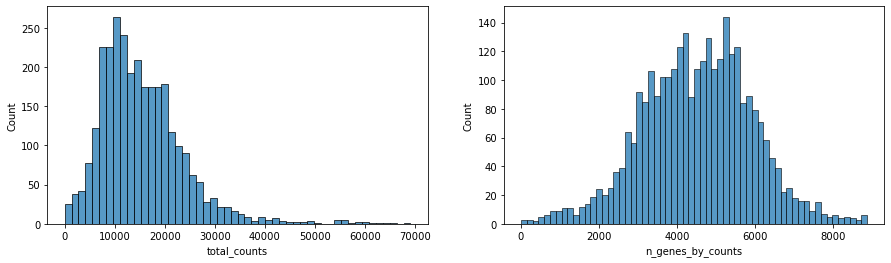

In [297]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])


<AxesSubplot:xlabel='total_counts', ylabel='Count'>

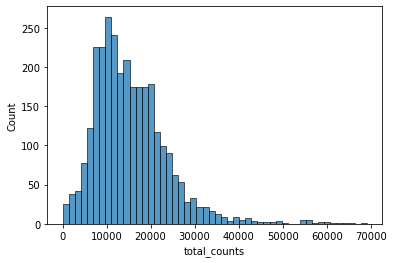

In [298]:
sns.histplot(adata.obs['total_counts'])

**Filtering**

In [299]:
adata.obs.sort_values('total_counts')

in_tissue  array_row  array_col  n_genes_by_counts  \
CACAGTCCCGCTTCGC-1          1         60        112                  3   
AGCGATGCGCCTAATA-1          1         64        108                 38   
AGATACCAATAGAACC-1          1         64        110                 66   
GGAGTTGATTCTGTGT-1          1         68        112                179   
AGAAGAGCGCCGTTCC-1          1         38         88                238   
...                       ...        ...        ...                ...   
CTGACTGCGCAGCTCG-1          1         31        101               8821   
TGGCCAAACTGAAGTA-1          1         28         76               8444   
CTAACGAAACTTGCTG-1          1         30         94               8861   
TTGTTCAGTGTGCTAC-1          1         24         64               8457   
CATGGTCTAGATACCG-1          1         26         66               8574   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
CACAGTCCCGCTTCGC-1                 1.386294           3.0            1.386294   
AGCGATGCGCCTAATA-1                 3.663562          43.0            3.784190   
AGATACCAATAGAACC-1                 4.204693          73.0            4.304065   
GGAGTTGATTCTGTGT-1                 5.192957         226.0            5.424950   
AGAAGAGCGCCGTTCC-1                 5.476464         295.0            5.690360   
...                                     ...           ...                 ...   
CTGACTGCGCAGCTCG-1                 9.085004       61512.0           11.027004   
TGGCCAAACTGAAGTA-1                 9.041330       62504.0           11.043002   
CTAACGAAACTTGCTG-1                 9.089528       63739.0           11.062568   
TTGTTCAGTGTGCTAC-1                 9.042868       65866.0           11.095393   
CATGGTCTAGATACCG-1                 9.056606       69102.0           11.143353   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
CACAGTCCCGCTTCGC-1                  100.000000                   100.000000   
AGCGATGCGCCTAATA-1                  100.000000                   100.000000   
AGATACCAATAGAACC-1                   78.082192                   100.000000   
GGAGTTGATTCTGTGT-1                   42.920354                    65.044248   
AGAAGAGCGCCGTTCC-1                   36.271186                    53.220339   
...                                        ...                          ...   
CTGACTGCGCAGCTCG-1                   17.407985                    23.345038   
TGGCCAAACTGAAGTA-1                   19.035582                    25.241585   
CTAACGAAACTTGCTG-1                   17.661087                    23.684087   
TTGTTCAGTGTGCTAC-1                   17.673762                    24.381320   
CATGGTCTAGATACCG-1                   18.657926                    25.209111   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  
CACAGTCCCGCTTCGC-1                   100.000000                   100.000000  
AGCGATGCGCCTAATA-1                   100.000000                   100.000000  
AGATACCAATAGAACC-1                   100.000000                   100.000000  
GGAGTTGATTCTGTGT-1                   100.000000                   100.000000  
AGAAGAGCGCCGTTCC-1                    87.118644                   100.000000  
...                                         ...                          ...  
CTGACTGCGCAGCTCG-1                    31.385746                    45.608987  
TGGCCAAACTGAAGTA-1                    33.629848                    48.248112  
CTAACGAAACTTGCTG-1                    31.945904                    45.893409  
TTGTTCAGTGTGCTAC-1                    33.152157                    48.190265  
CATGGTCTAGATACCG-1                    33.799311                    48.848080  

[2987 rows x 11 columns]

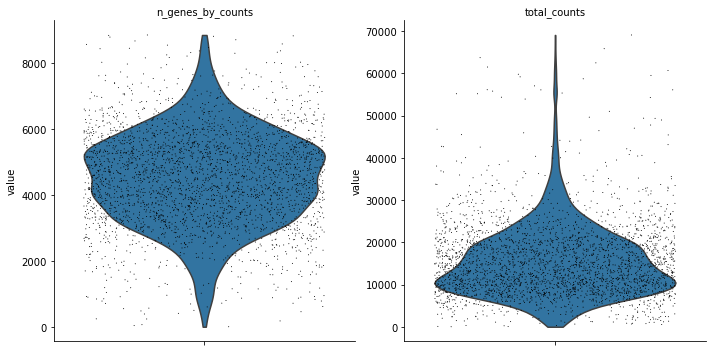

In [300]:
#Original code
#sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], 
             #jitter=0.4, multi_panel=True)

#Modified
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], 
             jitter=0.4, multi_panel=True)

In [306]:
#pct mito count is not present
#sc.pp.filter_cells(adata, min_counts=5000)
#adata_filtered_3= sc.pp.filter_cells(adata_filtered_2, max_counts=35000)
#adata = adata[adata.obs["pct_counts_mt"] < 20]  
#adata = adata[adata.obs["pct_counts_ribo"] < 2]

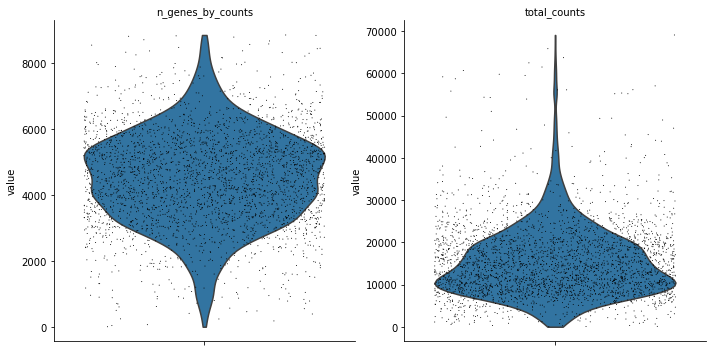

In [302]:
#Original code after filtering
#sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], 
             #jitter=0.4, multi_panel=True)
    
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], 
             jitter=0.4, multi_panel=True)

Min cells filter

In [307]:
sc.pp.filter_genes(adata, min_cells=10) #Filter genes based on minimum number of cells. 

Pre-processing: normalize and log transform <br>

In [308]:
adata.var

gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
Mrpl15          ENSMUSG00000033845  Gene Expression  mm10-3.0.0_premrna   
Gm37988         ENSMUSG00000104217  Gene Expression  mm10-3.0.0_premrna   
Tcea1           ENSMUSG00000033813  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
Vamp7           ENSMUSG00000051412  Gene Expression  mm10-3.0.0_premrna   
Spry3           ENSMUSG00000061654  Gene Expression  mm10-3.0.0_premrna   
Tmlhe           ENSMUSG00000079834  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   

                   mt  n_cells_by_counts  mean_counts  log1p_mean_counts  \
Xkr4            False                672     0.275527           0.243360   
Sox17           False                126     0.044191           0.043243   
Mrpl15          False               1555     0.839973           0.609751   
Gm37988         False                 67     0.023770           0.023492   
Tcea1           False               1284     0.640442           0.494966   
...               ...                ...          ...                ...   
Vamp7           False               1051     0.467359           0.383464   
Spry3           False                327     0.123535           0.116480   
Tmlhe           False                 55     0.019083           0.018903   
AC149090.1      False               1524     0.933713           0.659442   
CAAA01118383.1  False                567     0.222631           0.201005   

                pct_dropout_by_counts  total_counts  log1p_total_counts  \
Xkr4                        77.502511         823.0            6.714170   
Sox17                       95.781721         132.0            4.890349   
Mrpl15                      47.941078        2509.0            7.828038   
Gm37988                     97.756947          71.0            4.276666   
Tcea1                       57.013726        1913.0            7.556951   
...                               ...           ...                 ...   
Vamp7                       64.814195        1396.0            7.242083   
Spry3                       89.052561         369.0            5.913503   
Tmlhe                       98.158688          57.0            4.060443   
AC149090.1                  48.978909        2789.0            7.933797   
CAAA01118383.1              81.017744         665.0            6.501290   

                n_cells  
Xkr4                661  
Sox17               125  
Mrpl15             1536  
Gm37988              64  
Tcea1              1269  
...                 ...  
Vamp7              1046  
Spry3               323  
Tmlhe                52  
AC149090.1         1514  
CAAA01118383.1      561  

[17064 rows x 11 columns]

Let us find the gene with most counts and plot it before and after normalization

In [309]:
# Sum the gene expression counts across cells
gene_counts_sum = np.sum(adata.X, axis=0)
# Find the gene with the highest sum
gene_with_most_counts = adata.var_names[np.argmax(gene_counts_sum)]
print("Gene with the most counts:", gene_with_most_counts)

Gene with the most counts: mt-Co3


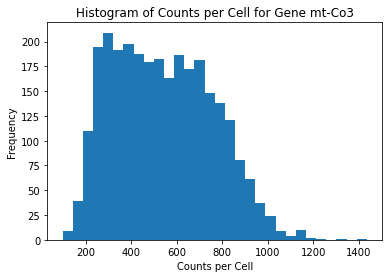

In [310]:
# Specify the gene name
gene_name = 'mt-Co3'

# Get the index of the gene in adata.var_names
gene_index = list(adata.var_names).index(gene_name)

# Extract the gene expression counts for the gene
gene_counts = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_array = gene_counts.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_array, bins=30)
plt.title(f"Histogram of Counts per Cell for Gene {gene_name}")
plt.xlabel("Counts per Cell")
plt.ylabel("Frequency")
plt.show()

In [311]:
sc.pp.normalize_total(adata, inplace=True, target_sum=1e4)

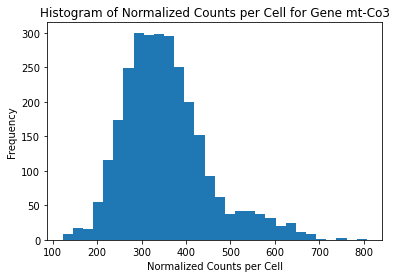

In [312]:
# Get the normalized gene expression counts for the gene
gene_counts_normalized = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_normalized_array = gene_counts_normalized.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_normalized_array, bins=30)
plt.title(f"Histogram of Normalized Counts per Cell for Gene {gene_name}")
plt.xlabel("Normalized Counts per Cell")
plt.ylabel("Frequency")
plt.show()

In [313]:
#Log transform the data
sc.pp.log1p(adata)

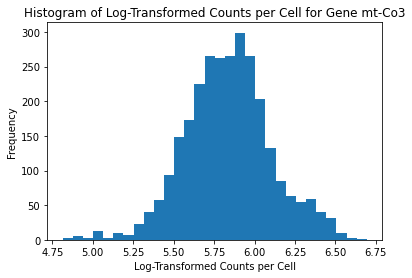

In [314]:
# Get the log-transformed gene expression counts for the gene
gene_counts_log_transformed = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_log_transformed_array = gene_counts_log_transformed.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_log_transformed_array, bins=30)
plt.title(f"Histogram of Log-Transformed Counts per Cell for Gene {gene_name}")
plt.xlabel("Log-Transformed Counts per Cell")
plt.ylabel("Frequency")
plt.show()

Now the count values are within a small range (instead of orders of magnitude). 

# **Identify highly-variable genes**

In [315]:
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

Notice that a new column labeled highly_variable is added to the daraframe with True or false in addition to columns with some stats (means, dispersions, diseprsions_norm)

In [316]:
adata.var

gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
Mrpl15          ENSMUSG00000033845  Gene Expression  mm10-3.0.0_premrna   
Gm37988         ENSMUSG00000104217  Gene Expression  mm10-3.0.0_premrna   
Tcea1           ENSMUSG00000033813  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
Vamp7           ENSMUSG00000051412  Gene Expression  mm10-3.0.0_premrna   
Spry3           ENSMUSG00000061654  Gene Expression  mm10-3.0.0_premrna   
Tmlhe           ENSMUSG00000079834  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   

                   mt  n_cells_by_counts  mean_counts  log1p_mean_counts  \
Xkr4            False                672     0.275527           0.243360   
Sox17           False                126     0.044191           0.043243   
Mrpl15          False               1555     0.839973           0.609751   
Gm37988         False                 67     0.023770           0.023492   
Tcea1           False               1284     0.640442           0.494966   
...               ...                ...          ...                ...   
Vamp7           False               1051     0.467359           0.383464   
Spry3           False                327     0.123535           0.116480   
Tmlhe           False                 55     0.019083           0.018903   
AC149090.1      False               1524     0.933713           0.659442   
CAAA01118383.1  False                567     0.222631           0.201005   

                pct_dropout_by_counts  total_counts  log1p_total_counts  \
Xkr4                        77.502511         823.0            6.714170   
Sox17                       95.781721         132.0            4.890349   
Mrpl15                      47.941078        2509.0            7.828038   
Gm37988                     97.756947          71.0            4.276666   
Tcea1                       57.013726        1913.0            7.556951   
...                               ...           ...                 ...   
Vamp7                       64.814195        1396.0            7.242083   
Spry3                       89.052561         369.0            5.913503   
Tmlhe                       98.158688          57.0            4.060443   
AC149090.1                  48.978909        2789.0            7.933797   
CAAA01118383.1              81.017744         665.0            6.501290   

                n_cells  highly_variable     means  dispersions  \
Xkr4                661             True  0.178254     0.060677   
Sox17               125            False  0.032640    -0.113287   
Mrpl15             1536            False  0.428420    -0.287307   
Gm37988              64            False  0.013888    -0.320398   
Tcea1              1269            False  0.333002    -0.280706   
...                 ...              ...       ...          ...   
Vamp7              1046            False  0.262624    -0.241649   
Spry3               323            False  0.070426    -0.314867   
Tmlhe                52            False  0.013690    -0.069943   
AC149090.1         1514            False  0.443481    -0.210596   
CAAA01118383.1      561            False  0.134599    -0.179893   

                dispersions_norm  
Xkr4                    1.159757  
Sox17                   0.298474  
Mrpl15                 -0.666515  
Gm37988                -0.726917  
Tcea1                  -0.638268  
...                          ...  
Vamp7                  -0.337040  
Spry3                  -0.699537  
Tmlhe                   0.513064  
AC149090.1             -0.338259  
CAAA01118383.1         -0.031289  

[17064 rows x 15 columns]

Let us create a plot showing the gene expression dispersion and mean relationship for genes, highlighting those genes that exhibit higher variability across cells.

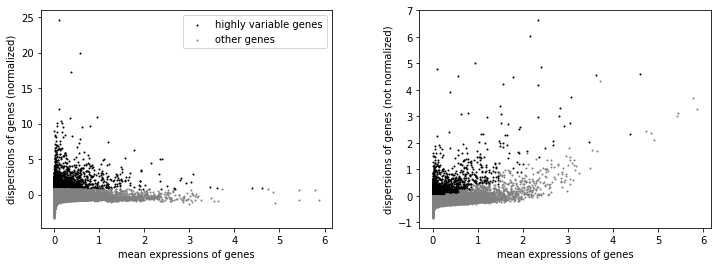

In [317]:
sc.pl.highly_variable_genes(adata)

**Dimensionality reduction:** 

In [318]:
adata = adata[:, adata.var.highly_variable]

In [322]:
sc.pp.pca(adata) #By default calculates 30 PCAs

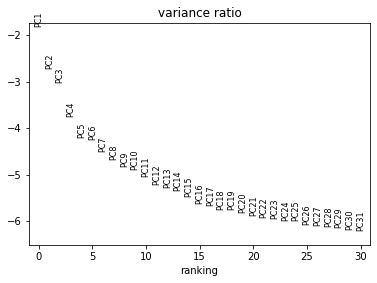

In [323]:
sc.pl.pca_variance_ratio(adata, log=True)

In [324]:
sc.pp.neighbors(adata, n_pcs=20)

In [191]:
pip install scanpy tensorflow umap-learn

  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
INFO: pip is looking at multiple versions of numba to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for numba>=0.41.0 from https://files.pythonhosted.org/packages/bc/43/a4a058fc1b58aa523b69141b98e51edf795fd0ff20e690dc8c1ed654c7fd/numba-0.57.1-cp39-cp39-win_amd64.whl.metadata
  Using cached numba-0.57.1-cp39-cp39-win_amd64.whl.metadata (2.8 kB)
  Obtaining dependency information for llvmlite<0.41,>=0.40.0dev0 from https://files.pythonhosted.org/packages/e7/fb/a7430788e80cff1ec512ba6ca6d2159c0ed6293530b0d502d171e299872f/llvmlite-0.40.1-cp39-cp39-win_amd64.whl.metadata
  Using cached llvmlite-0.40.1-cp39-cp39-win_amd64.whl.metadata (4.8 kB)
Using cached

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [196]:
pip install git+https://github.com/theislab/scanpy.git@1.7.0rc1

  Cloning https://github.com/theislab/scanpy.git (to revision 1.7.0rc1) to c:\users\aubhi\appdata\local\temp\pip-req-build-ix7mtukq
  Resolved https://github.com/theislab/scanpy.git to commit 6055f4414368b3a4d278d031346a7664f3e7a41c
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 69.9/69.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 13.7/13.7 MB 6.5 MB/s eta 0:00:00
  Obtaining dependency information for dunamai from https://files.pythonh

  Running command git clone --filter=blob:none --quiet https://github.com/theislab/scanpy.git 'C:\Users\aubhi\AppData\Local\Temp\pip-req-build-ix7mtukq'
  Running command git checkout -q 6055f4414368b3a4d278d031346a7664f3e7a41c
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
bayesian-optimization 1.4.2 requires colorama>=0.4.6, but you have colorama 0.4.4 which is incompatible.
jax 0.4.13 requires numpy>=1.21, but you have numpy 1.20.3 which is incompatibl

In [325]:
sc.tl.umap(adata, n_components=2) # Solution for this was found on https://github.com/scverse/scanpy/issues/1579

In [326]:
#This code is working
sc.tl.pca(adata)

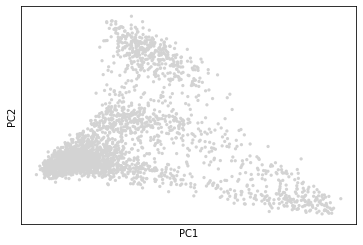

In [327]:
sc.pl.pca(adata)

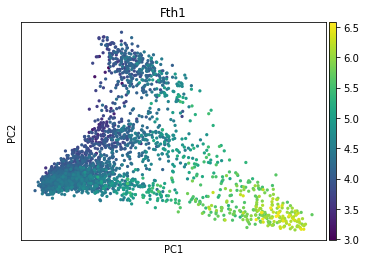

In [328]:
sc.pl.pca(adata, color= ['Fth1'])

Plot the umap components to visualize the data. This data needs to be clustered into various clusters. 

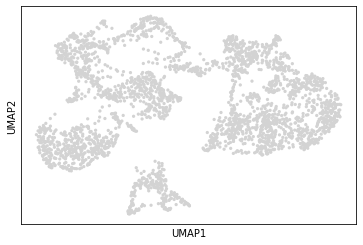

In [329]:
sc.pl.umap(adata)

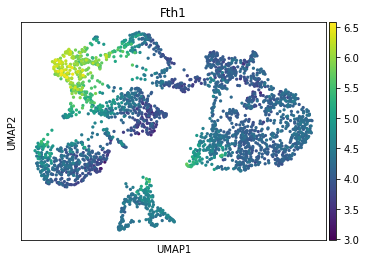

In [330]:
sc.pl.umap(adata, color= ['Fth1'])

Let us visualize results for a few selected Genes. First, let's have a quick look at the gene names and pick the ones that showed up in large number of cells. 

In [331]:
sorted_by_num_cells = adata.var['n_cells_by_counts'].sort_values(ascending=False)
sorted_by_num_cells


Gm42418    2985
mt-Nd2     2984
Fth1       2982
Tmsb4x     2977
Scd2       2971
           ... 
Gpr20        10
Gm48893      10
Gm47450      10
Nox4         10
Gm36757      10
Name: n_cells_by_counts, Length: 2000, dtype: int64

In [333]:
sorted_by_num_cells.head(20)

Gm42418    2985
mt-Nd2     2984
Fth1       2982
Tmsb4x     2977
Scd2       2971
Malat1     2962
Dbi        2955
Plp1       2948
Camk2n1    2936
Ndrg2      2934
Cd81       2927
Nrgn       2922
Cck        2910
Ptgds      2910
Ptma       2909
Olfm1      2909
Pcp4       2905
Ppp3ca     2891
Tubb4a     2876
Cmss1      2850
Name: n_cells_by_counts, dtype: int64

In [343]:
top_20= sorted_by_num_cells.head(20)
top_20.index

Index(['Gm42418', 'mt-Nd2', 'Fth1', 'Tmsb4x', 'Scd2', 'Malat1', 'Dbi', 'Plp1',
       'Camk2n1', 'Ndrg2', 'Cd81', 'Nrgn', 'Cck', 'Ptgds', 'Ptma', 'Olfm1',
       'Pcp4', 'Ppp3ca', 'Tubb4a', 'Cmss1'],
      dtype='object')

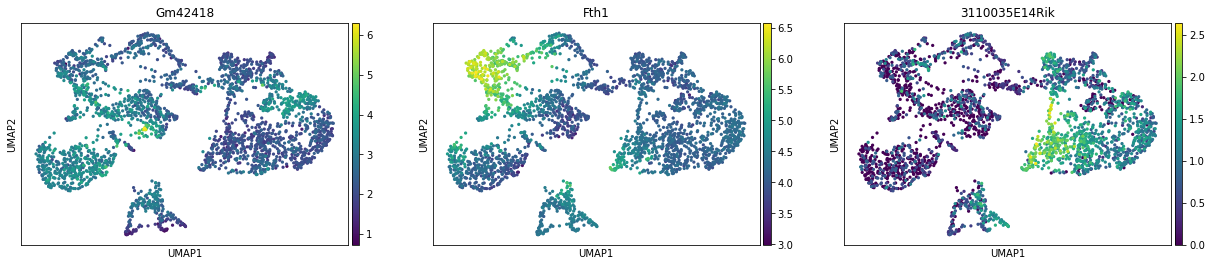

In [332]:
sc.pl.umap(adata, color=["Gm42418", "Fth1", "3110035E14Rik"])

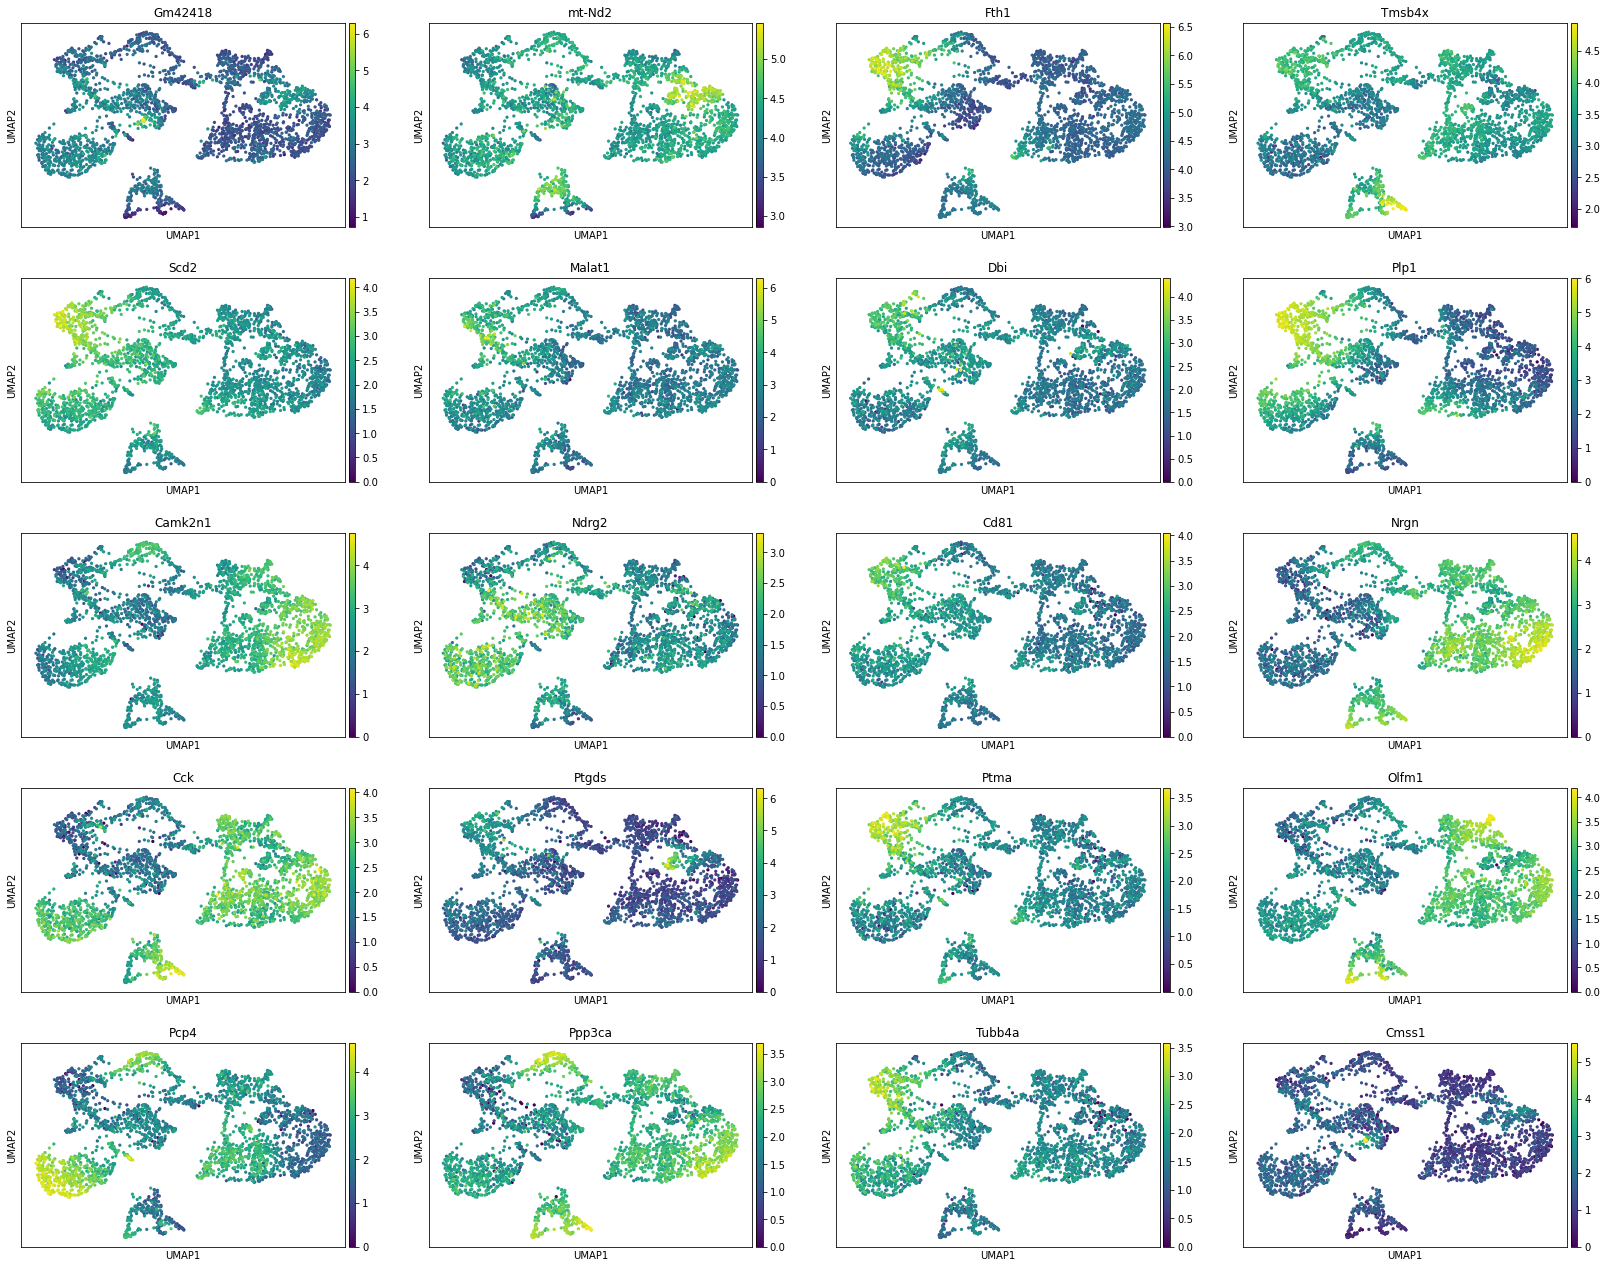

In [344]:
sc.pl.umap(adata, color= top_20.index)

**We are ready to perform clustering**

The library "leidenalg" is a Python library that provides an implementation of the Leiden algorithm for community detection in networks. The Leiden algorithm is a popular method for detecting communities or clusters within a network, often applied in the field of network analysis and graph-based data analysis.

In [345]:
!pip install leidenalg

  Obtaining dependency information for leidenalg from https://files.pythonhosted.org/packages/64/a3/25727f99c7d9bb702d3a77a4431dc378745224bc96a8d5f295810213bf78/leidenalg-0.10.1-cp38-abi3-win_amd64.whl.metadata
  Obtaining dependency information for igraph<0.11,>=0.10.0 from https://files.pythonhosted.org/packages/e4/2c/aea4c9ff8d33c1ba45d3964d758019097c363363c1a67dbada9d9f98b3d9/igraph-0.10.6-cp39-abi3-win_amd64.whl.metadata
   ---------------------------------------- 1.6/1.6 MB 9.9 MB/s eta 0:00:00
   ---------------------------------------- 2.9/2.9 MB 12.3 MB/s eta 0:00:00


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063



*   **sc.tl.leiden(adata, key_added="clusters"):** This function applies the Leiden algorithm for community detection on the preprocessed data. It identifies clusters of cells based on the neighborhood information previously computed. The resulting clusters are assigned as annotations and added to the adata object with the key name "clusters".





In [346]:
sc.tl.leiden(adata, resolution=0.6, key_added="clusters") #Experiment with values 0.3, 0.6, and 1.0. View the result in the UMAP plot below. 

A new column (last one) gets added to obs with the cluster label. 

In [347]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4678   
AAACACCAATAACTGC-1          1         59         19               3549   
AAACAGAGCGACTCCT-1          1         14         94               6779   
AAACAGCTTTCAGAAG-1          1         43          9               3108   
AAACAGGGTCTATATT-1          1         47         13               4515   
...                       ...        ...        ...                ...   
TTGTTCAGTGTGCTAC-1          1         24         64               8457   
TTGTTGTGTGTCAAGA-1          1         31         77               3464   
TTGTTTCACATCCAGG-1          1         58         42               5457   
TTGTTTCATTAGTCTA-1          1         60         30               5300   
TTGTTTCCATACAACT-1          1         45         27               5143   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.450840       14284.0            9.566965   
AAACACCAATAACTGC-1                 8.174703        9951.0            9.205529   
AAACAGAGCGACTCCT-1                 8.821732       32155.0           10.378354   
AAACAGCTTTCAGAAG-1                 8.042056        7935.0            8.979165   
AAACAGGGTCTATATT-1                 8.415382       14483.0            9.580800   
...                                     ...           ...                 ...   
TTGTTCAGTGTGCTAC-1                 9.042868       65866.0           11.095393   
TTGTTGTGTGTCAAGA-1                 8.150468        8785.0            9.080914   
TTGTTTCACATCCAGG-1                 8.604838       19956.0            9.901335   
TTGTTTCATTAGTCTA-1                 8.575651       18351.0            9.817493   
TTGTTTCCATACAACT-1                 8.545586       17529.0            9.771669   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   27.457295                    32.812938   
AAACACCAATAACTGC-1                   37.061602                    42.337454   
AAACAGAGCGACTCCT-1                   23.784792                    29.830508   
AAACAGCTTTCAGAAG-1                   32.917454                    39.054820   
AAACAGGGTCTATATT-1                   30.994960                    36.415107   
...                                        ...                          ...   
TTGTTCAGTGTGCTAC-1                   17.673762                    24.381320   
TTGTTGTGTGTCAAGA-1                   27.137166                    33.249858   
TTGTTTCACATCCAGG-1                   23.872520                    29.695330   
TTGTTTCATTAGTCTA-1                   24.892376                    30.477903   
TTGTTTCCATACAACT-1                   25.415027                    31.330937   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    39.897788                    52.856343   
AAACACCAATAACTGC-1                    49.110642                    60.586876   
AAACAGAGCGACTCCT-1                    37.860364                    51.397916   
AAACAGCTTTCAGAAG-1                    46.389414                    59.206049   
AAACAGGGTCTATATT-1                    43.506180                    56.031209   
...                                         ...                          ...   
TTGTTCAGTGTGCTAC-1                    33.152157                    48.190265   
TTGTTGTGTGTCAAGA-1                    41.343199                    55.310188   
TTGTTTCACATCCAGG-1                    37.748046                    51.638605   
TTGTTTCATTAGTCTA-1                    38.194104                    51.670209   
TTGTTTCCATACAACT-1                    39.505962                    53.191853   

                    n_counts clusters  
AAACAAGTATCTCCCA-1   14284.0        0  
AAACACCAATAACTGC-1    9951.0        8  
AAACAGAGCGACTCCT-1   32155.0        3  
AAACAGCTTTCAGAAG-1    7935.0        8  
AAACAGGGTCTATATT-1   14483.0        1  
...     

UMAP with color code

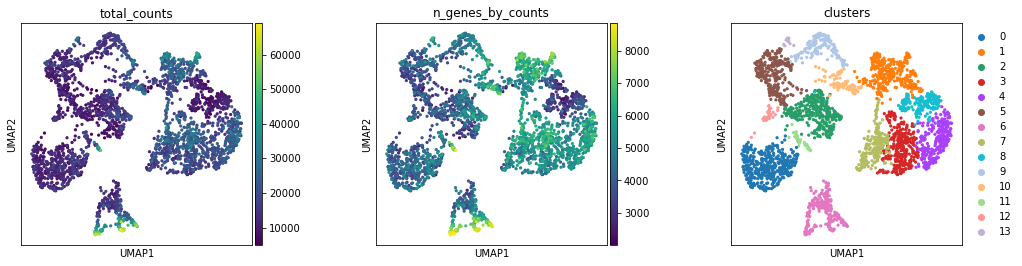

In [348]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

Spatial plot with total and n_genes_by_counts

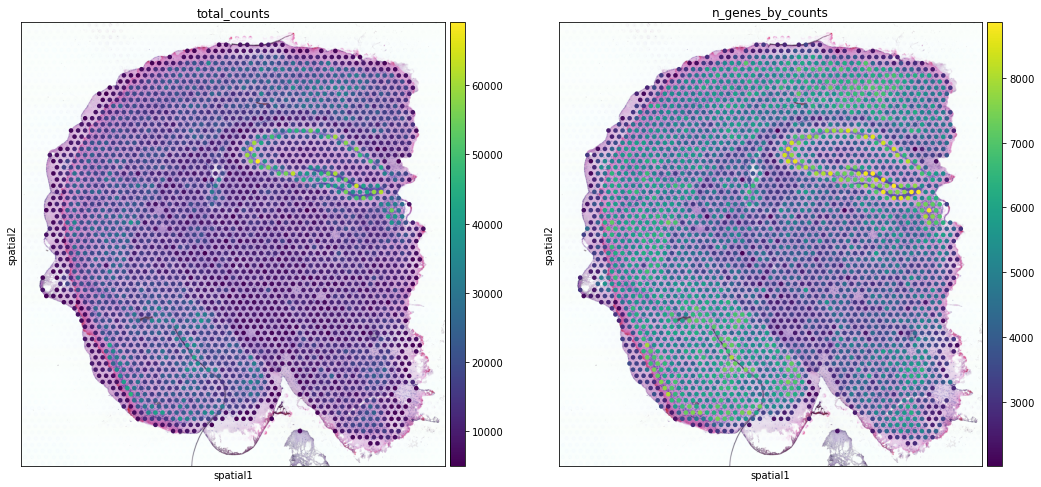

In [349]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

Spatial plot with color code

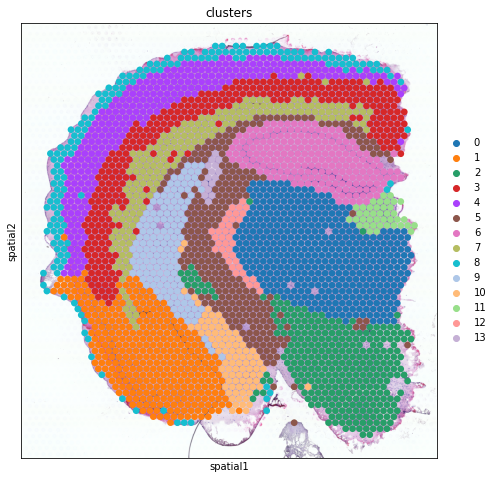

In [350]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)

==========================================================

# **Find marker genes**

*   **sc.tl.rank_genes_groups(adata, "clusters", method="t-test"):** This function performs differential gene expression analysis between different clusters defined by the "clusters" column in the adata.obs dataframe. It compares the gene expression profiles between the clusters using a statistical test, such as the t-test, to identify genes that are differentially expressed between the clusters. The results of the analysis are stored in the adata object.

In [351]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")  #Group by clusters and perform differential gene expression analysis using t-tets (also try 'wilcoxon')


*   **sc.pl.rank_genes_groups(adata, n_genes=10):** This function creates plot used to visualize the results of gene ranking after performing differential expression analysis between groups of cells. It provides insights into the genes that are differentially expressed and potentially associated with specific groups or conditions in your dataset.

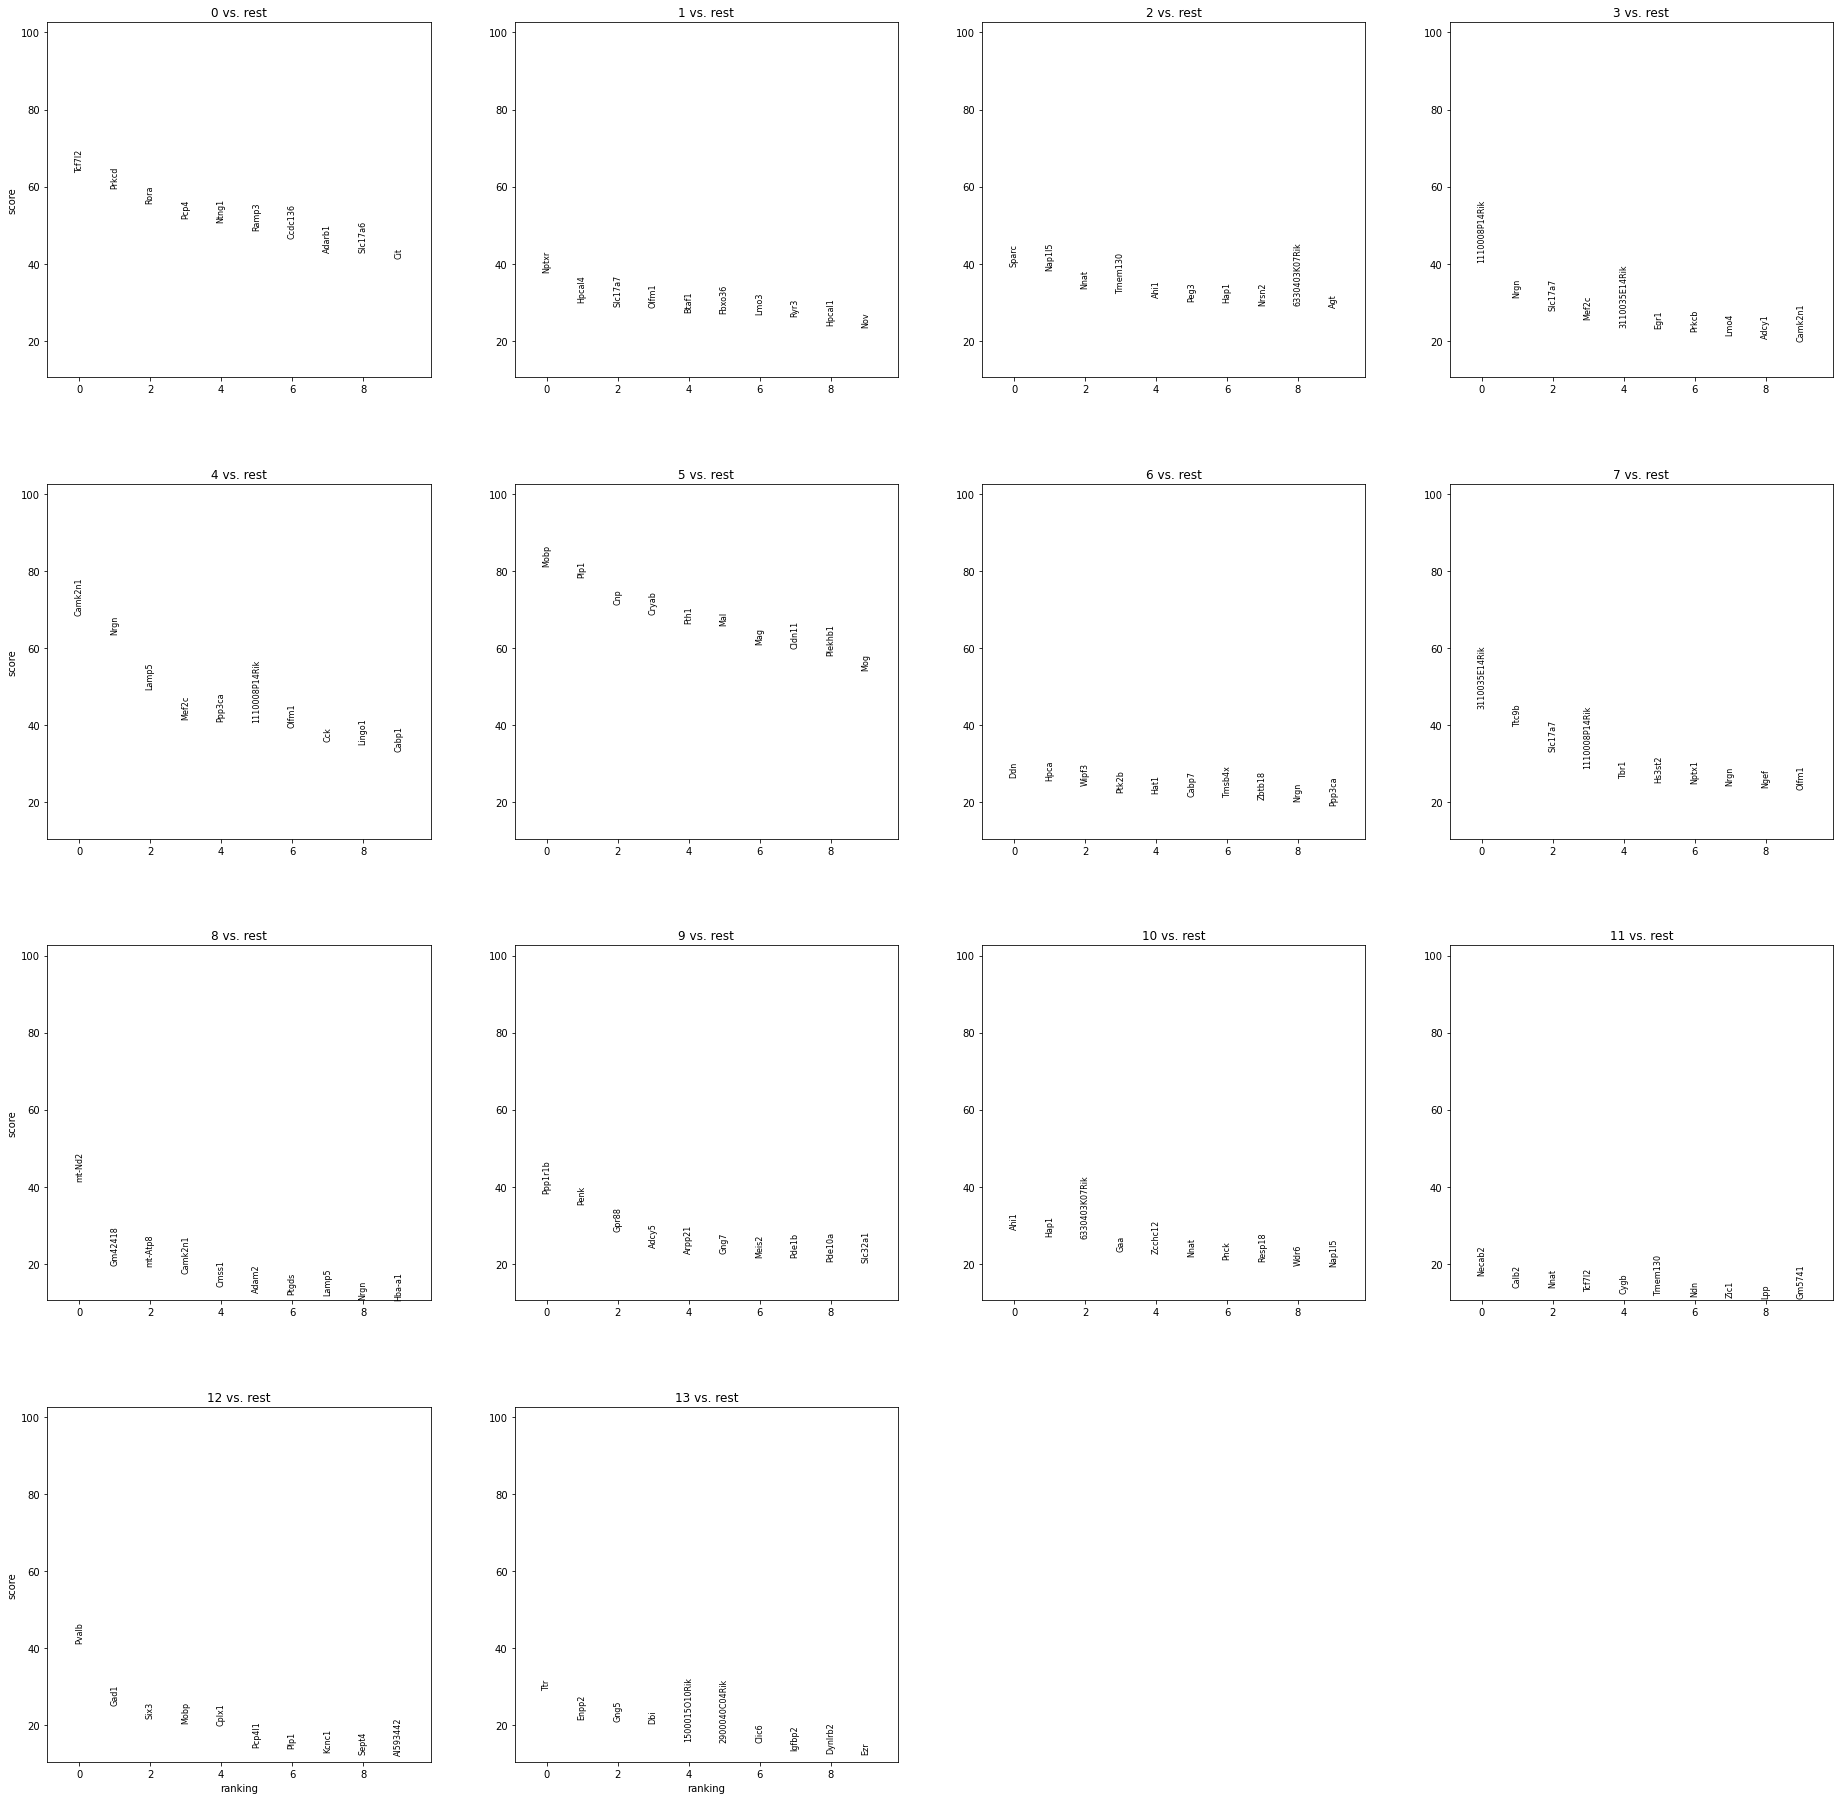

In [352]:
sc.pl.rank_genes_groups(adata, n_genes=10)



*   **sc.pl.rank_genes_groups_heatmap(adata, groups="5", n_genes=10, groupby="clusters"):** This function creates a heatmap visualization of the top differentially expressed genes associated with a specific cluster/group ("4" in this case) from the results of the differential gene expression analysis.



categories: 0, 1, 2, etc.
var_group_labels: 6


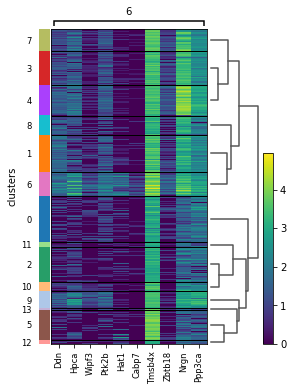

In [353]:
sc.pl.rank_genes_groups_heatmap(adata, groups="6", n_genes=10, groupby="clusters")

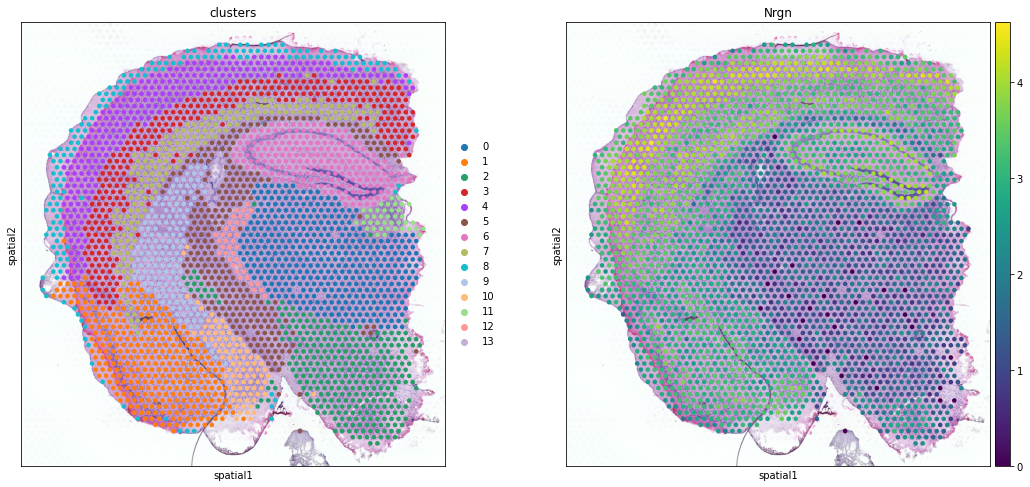

In [354]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["clusters", "Nrgn"])

**Top gene per cluster**

In [355]:
# Obtain the top features for each cluster
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names


In [356]:
top_features = {}
n_top_genes = 10  # desired number of top genes per cluster
for group in groups:
    top_features[group] = result["names"][group][:n_top_genes]  

# Print the top features for each cluster
for group, features in top_features.items():
    print(f"Cluster {group} top features:")
    for feature in features:
        print(feature)
    print()

Cluster 0 top features:
Tcf7l2
Prkcd
Rora
Pcp4
Ntng1
Ramp3
Ccdc136
Adarb1
Slc17a6
Cit

Cluster 1 top features:
Nptxr
Hpcal4
Slc17a7
Olfm1
Btaf1
Fbxo36
Lmo3
Ryr3
Hpcal1
Nov

Cluster 2 top features:
Sparc
Nap1l5
Nnat
Tmem130
Ahi1
Peg3
Hap1
Nrsn2
6330403K07Rik
Agt

Cluster 3 top features:
1110008P14Rik
Nrgn
Slc17a7
Mef2c
3110035E14Rik
Egr1
Prkcb
Lmo4
Adcy1
Camk2n1

Cluster 4 top features:
Camk2n1
Nrgn
Lamp5
Mef2c
Ppp3ca
1110008P14Rik
Olfm1
Cck
Lingo1
Cabp1

Cluster 5 top features:
Mobp
Plp1
Cnp
Cryab
Fth1
Mal
Mag
Cldn11
Plekhb1
Mog

Cluster 6 top features:
Ddn
Hpca
Wipf3
Ptk2b
Hat1
Cabp7
Tmsb4x
Zbtb18
Nrgn
Ppp3ca

Cluster 7 top features:
3110035E14Rik
Ttc9b
Slc17a7
1110008P14Rik
Tbr1
Hs3st2
Nptx1
Nrgn
Ngef
Olfm1

Cluster 8 top features:
mt-Nd2
Gm42418
mt-Atp8
Camk2n1
Cmss1
Adam2
Ptgds
Lamp5
Nrgn
Hba-a1

Cluster 9 top features:
Ppp1r1b
Penk
Gpr88
Adcy5
Arpp21
Gng7
Meis2
Pde1b
Pde10a
Slc32a1

Cluster 10 top features:
Ahi1
Hap1
6330403K07Rik
Gaa
Zcchc12
Nnat
Pnck
Resp18
Wdr6
Nap1l5

Cluster 

In [357]:
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("scanpy_result.csv")

The names, longfoldchanges, scores and p values for each data points in each cluster is exported to a csv file that can be used to identify cell types in each cluster. 

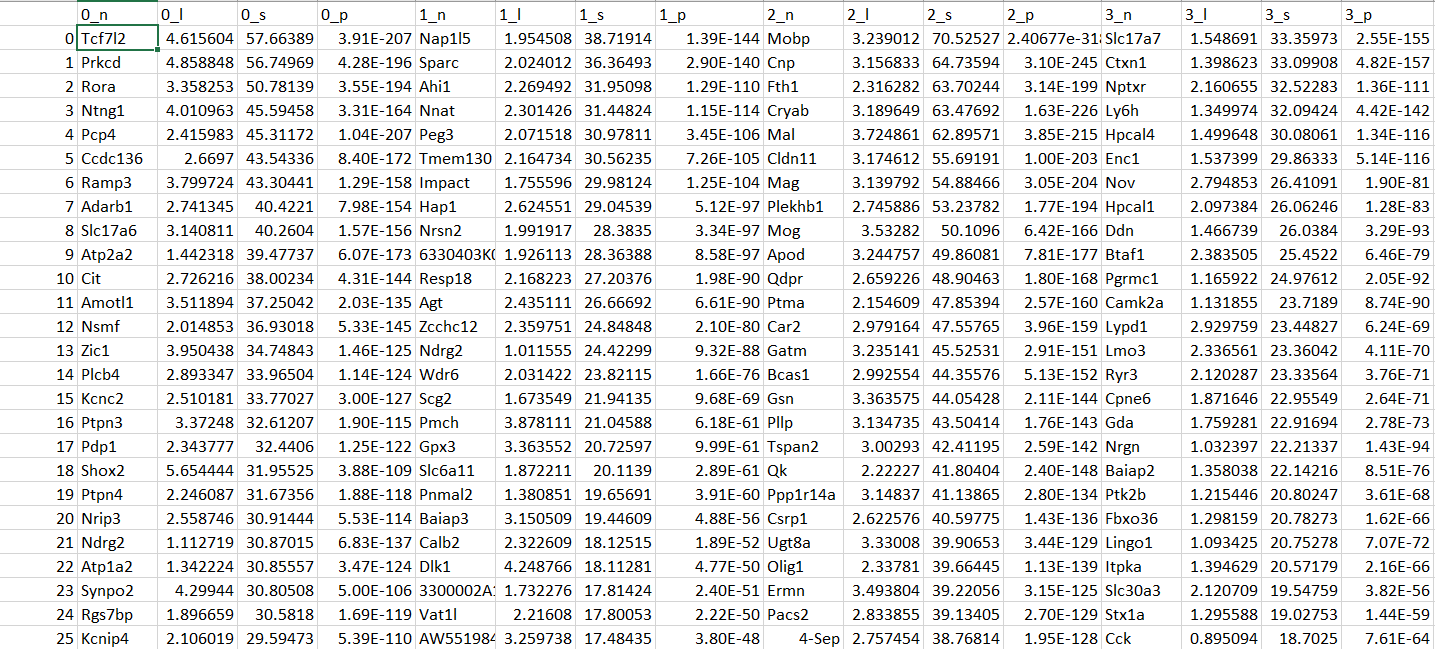

# **Identifying cell types for each cluster**

## SCSA: cell type annotation for single-cell RNA-seq data
https://github.com/bioinfo-ibms-pumc/SCSA
<br>
https://www.frontiersin.org/articles/10.3389/fgene.2020.00490/full

Make sure we are working in our chosen directory to clone the scsa repo.

In [359]:
#Needs to be run on Mac
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


Clone the code into our chosen path. 

In [181]:
!git clone https://github.com/bioinfo-ibms-pumc/SCSA.git

xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun


Install other required libraries from the scsa installation instructions. 

In [182]:
!pip install openpyxl

Change to scsa directory.

In [183]:
!pwd

/Users/az/Desktop/YouTubeTutorials-main/Outside/Spatial


In [184]:
cd SCSA

[Errno 2] No such file or directory: 'SCSA'
/Users/az/Desktop/YouTubeTutorials-main/Outside/Spatial


We are ready to run the scsa.py file. Let's look at the help. 

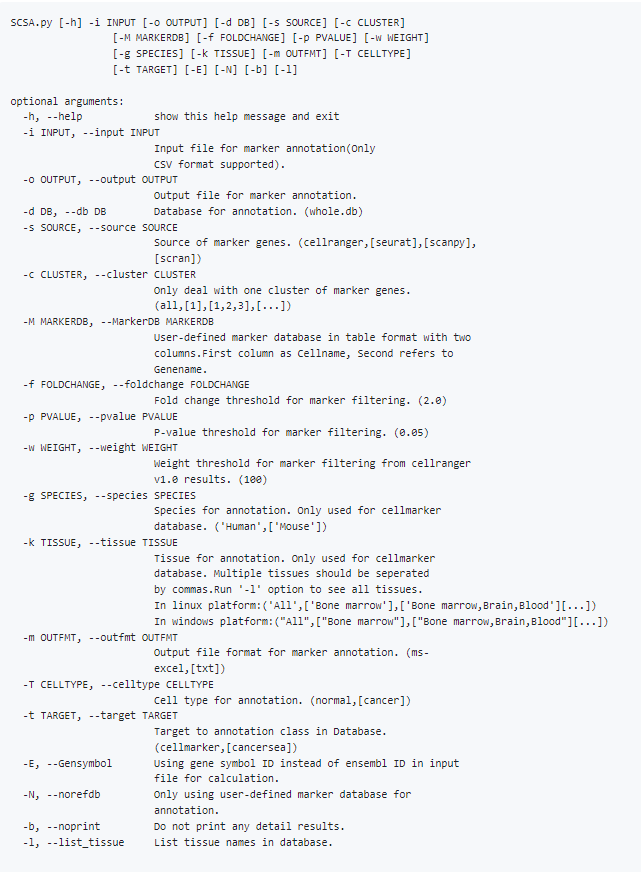

Run scsa.py by providing the scanpy result csv file as input and defining other inputs accordingly. Remember to set an appropriate p-value threshold to consider only the genes with markers below this threshold. Remember that a low threshold (<0.05) helps minimize the inclusion of genes that show differential expression by chance (or random) - reduce the risk of false positives. A low value may exclude genuine markers with weaker differential expression signals. 

In [185]:
!python SCSA.py -d whole.db -i /content/scanpy_result.csv -s scanpy -E -g Mouse -f1.5 -p 0.01 -o result.txt -m txt

python: can't open file '/Users/az/Desktop/YouTubeTutorials-main/Outside/Spatial/SCSA.py': [Errno 2] No such file or directory


Read the text file into a DataFrame to make it easy for us to add these details to our adata object. 

In [186]:
# Read the text document into a DataFrame
df = pd.read_csv('/content/SCSA/result.txt', sep='\t')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/SCSA/result.txt'

The scsa result provides multiple cell types for each cluster with corresponding z-scores. Let us pick the cell type with highest z-score and assign it to respective clusters. In reality, you need to carefully assess each cell type and pick the ones that make the most biological sense. 

In [187]:
# Group the data by "Cluster" and find the cell type with the highest Z-score in each group
highest_zscores = df.groupby('Cluster')['Z-score'].idxmax()

# Extract the corresponding cell types for the highest Z-scores
cell_types_with_highest_zscores = df.loc[highest_zscores, 'Cell Type'].tolist()

NameError: name 'df' is not defined

In [188]:
cell_types_with_highest_zscores

NameError: name 'cell_types_with_highest_zscores' is not defined

Create a dictionary of cluster value (number) and corresponding identified cell type. We will add a column to adata with cell types for each cluster number. 

In [189]:
cluster_to_cell_type = {cluster_num: cell_type for cluster_num, cell_type in enumerate(cell_types_with_highest_zscores)}
cluster_to_cell_type

NameError: name 'cell_types_with_highest_zscores' is not defined

In [190]:
adata.obs['clusters']

AAACAAGTATCTCCCA-1    0
AAACACCAATAACTGC-1    6
AAACAGAGCGACTCCT-1    1
AAACAGCTTTCAGAAG-1    6
AAACAGGGTCTATATT-1    2
                     ..
TTGTTAGCAAATTCGA-1    5
TTGTTGTGTGTCAAGA-1    0
TTGTTTCACATCCAGG-1    2
TTGTTTCATTAGTCTA-1    2
TTGTTTCCATACAACT-1    1
Name: clusters, Length: 2761, dtype: category
Categories (14, object): ['0', '1', '2', '3', ..., '10', '11', '12', '13']

Current cluster assignment has dtype of str (not Int). Let us change str to int before mapping clusters to cell types. 

In [191]:
adata.obs['clusters'] = adata.obs['clusters'].astype(int)


Map cluster numbers to cell types.

In [192]:
adata.obs['cell_types'] = adata.obs['clusters'].map(cluster_to_cell_type)


NameError: name 'cluster_to_cell_type' is not defined

In [193]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4678   
AAACACCAATAACTGC-1          1         59         19               3549   
AAACAGAGCGACTCCT-1          1         14         94               6779   
AAACAGCTTTCAGAAG-1          1         43          9               3108   
AAACAGGGTCTATATT-1          1         47         13               4515   
...                       ...        ...        ...                ...   
TTGTTAGCAAATTCGA-1          1         22         42               5553   
TTGTTGTGTGTCAAGA-1          1         31         77               3464   
TTGTTTCACATCCAGG-1          1         58         42               5457   
TTGTTTCATTAGTCTA-1          1         60         30               5300   
TTGTTTCCATACAACT-1          1         45         27               5143   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.450840       14284.0            9.566965   
AAACACCAATAACTGC-1                 8.174703        9951.0            9.205529   
AAACAGAGCGACTCCT-1                 8.821732       32155.0           10.378354   
AAACAGCTTTCAGAAG-1                 8.042056        7935.0            8.979165   
AAACAGGGTCTATATT-1                 8.415382       14483.0            9.580800   
...                                     ...           ...                 ...   
TTGTTAGCAAATTCGA-1                 8.622274       19896.0            9.898324   
TTGTTGTGTGTCAAGA-1                 8.150468        8785.0            9.080914   
TTGTTTCACATCCAGG-1                 8.604838       19956.0            9.901335   
TTGTTTCATTAGTCTA-1                 8.575651       18351.0            9.817493   
TTGTTTCCATACAACT-1                 8.545586       17529.0            9.771669   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   27.457295                    32.812938   
AAACACCAATAACTGC-1                   37.061602                    42.337454   
AAACAGAGCGACTCCT-1                   23.784792                    29.830508   
AAACAGCTTTCAGAAG-1                   32.917454                    39.054820   
AAACAGGGTCTATATT-1                   30.994960                    36.415107   
...                                        ...                          ...   
TTGTTAGCAAATTCGA-1                   22.502010                    28.784680   
TTGTTGTGTGTCAAGA-1                   27.137166                    33.249858   
TTGTTTCACATCCAGG-1                   23.872520                    29.695330   
TTGTTTCATTAGTCTA-1                   24.892376                    30.477903   
TTGTTTCCATACAACT-1                   25.415027                    31.330937   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    39.897788                    52.856343   
AAACACCAATAACTGC-1                    49.110642                    60.586876   
AAACAGAGCGACTCCT-1                    37.860364                    51.397916   
AAACAGCTTTCAGAAG-1                    46.389414                    59.206049   
AAACAGGGTCTATATT-1                    43.506180                    56.031209   
...                                         ...                          ...   
TTGTTAGCAAATTCGA-1                    36.886811                    50.914757   
TTGTTGTGTGTCAAGA-1                    41.343199                    55.310188   
TTGTTTCACATCCAGG-1                    37.748046                    51.638605   
TTGTTTCATTAGTCTA-1                    38.194104                    51.670209   
TTGTTTCCATACAACT-1                    39.505962                    53.191853   

                    n_counts  clusters  
AAACAAGTATCTCCCA-1   14284.0         0  
AAACACCAATAACTGC-1    9951.0         6  
AAACAGAGCGACTCCT-1   32155.0         1  
AAACAGCTTTCAGAAG-1    7935.0         6  
AAACAGGGTCTATATT-1   14483.0         2  
..

In this example, we only have 8 cell types despite identifying 13 clusters as some cell types repeat for different cluster numbers. 

In [194]:
adata.obs["cell_types"].unique()

KeyError: 'cell_types'

KeyError: 'Could not find key cell_types in .var_names or .obs.columns.'

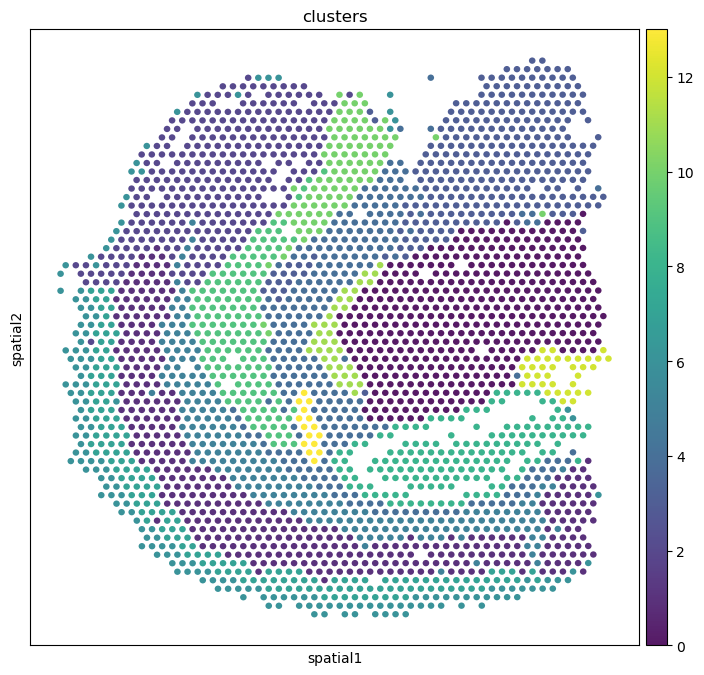

In [195]:
sc.pl.spatial(adata, img_key="hires", color=["clusters", "cell_types"], alpha=0.9)